# **LAB 4 - PART 2 Multi Layers Perceptron**

<font color="Orange">**NOTE**</font> : In this lab, you will need to use PyTorch. Please refer to the PyTorch documentation for installation instructions: https://pytorch.org.


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

Create Sine dataset with 9 sampling point as a activity sheet.<br>
Then, plot the dataset.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)


</details>

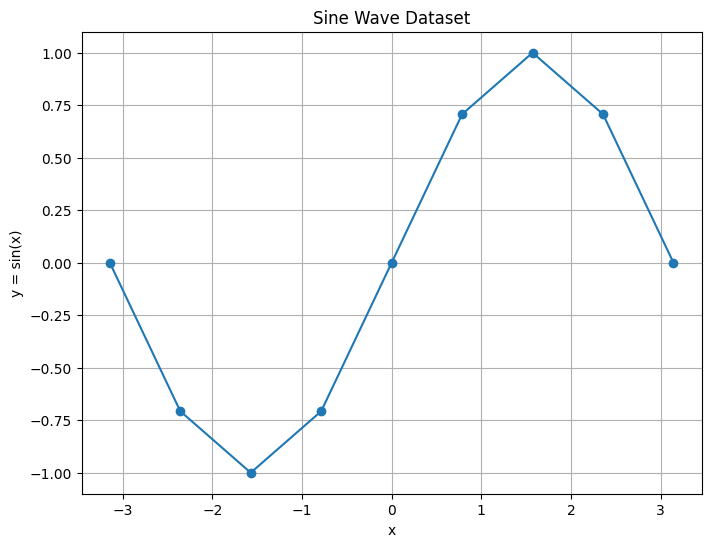

In [ ]:
### START CODE HERE ###

# Number of sampling points (at least 9)
num_points = 9

# Generate input values (x) within the range of -pi to pi
x = np.linspace(-np.pi, np.pi, num_points)

# Calculate corresponding output values (y) using the sine function
y = np.sin(x)

# Plot the sine wave
plt.figure(figsize=(8, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Sine Wave Dataset')
plt.xlabel('x')
plt.ylabel('y = sin(x)')
plt.grid(True)
plt.show()


### END CODE HERE ###

**Define the Multi Layers Perceptron class using pytorch.**<br>
Using `nn.Linear()` and `nn.ReLU()`

![image.png](attachment:image.png)

In [ ]:
dataset = np.column_stack((x, y))

# Print the dataset array
print("Dataset Array:")
print(dataset)

Dataset Array:
[[-3.14159265e+00 -1.22464680e-16]
 [-2.35619449e+00 -7.07106781e-01]
 [-1.57079633e+00 -1.00000000e+00]
 [-7.85398163e-01 -7.07106781e-01]
 [ 0.00000000e+00  0.00000000e+00]
 [ 7.85398163e-01  7.07106781e-01]
 [ 1.57079633e+00  1.00000000e+00]
 [ 2.35619449e+00  7.07106781e-01]
 [ 3.14159265e+00  1.22464680e-16]]


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class MLP(nn.Module):
    def __init__(self, input_size=1, hidden_size=2, output_size=1):
        """
        Multi-Layer Perceptron (MLP) class.

        Args:
            input_size (int): The size of the input layer.
            hidden_size (int): The size of the hidden layer.
            output_size (int): The size of the output layer.
        """
        super(MLP, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        """
        Forward pass of the MLP.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            in_fc1: This represents the input to the first fully connected layer (fc1). It is obtained by passing the input tensor x through the fc1 layer.

            fc1_x: This represents the output of the first fully connected layer (fc1) after applying the ReLU activation function. It is obtained by passing in_fc1 through the ReLU activation function.

            in_fc2: This represents the input to the second fully connected layer (fc2). It is obtained by passing fc1_x through the fc2 layer.

            fc2_x: This represents the output of the second fully connected layer (fc2) after applying the ReLU activation function. It is obtained by passing in_fc2 through the ReLU activation function.

            out: This represents the final output of the MLP model. It is obtained by passing fc2_x through the third fully connected layer (fc3).
        """
        in_fc1 = self.fc1(x)
        fc1_x = self.relu(in_fc1)
        in_fc2 = self.fc2(fc1_x)
        fc2_x = self.relu(in_fc2)
        out = self.fc3(fc2_x)
        return in_fc1, fc1_x, in_fc2, fc2_x, out

mlp = MLP()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.008)
print(mlp)



MLP(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=2, bias=True)
  (fc3): Linear(in_features=2, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
for param_tensor in mlp.state_dict():
    print(param_tensor, "\t", mlp.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

for name, param in mlp.state_dict().items():
    if 'weight' in name:
        print(name, ':\n', param)
    elif 'bias' in name:
        print(name, ':\n', param)

fc1.weight 	 torch.Size([2, 1])
fc1.bias 	 torch.Size([2])
fc2.weight 	 torch.Size([2, 2])
fc2.bias 	 torch.Size([2])
fc3.weight 	 torch.Size([1, 2])
fc3.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.008, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1, 2, 3, 4, 5]}]
fc1.weight :
 tensor([[-0.5222],
        [-0.8595]])
fc1.bias :
 tensor([-0.7488,  0.2895])
fc2.weight :
 tensor([[-0.0764,  0.3354],
        [-0.5184, -0.5721]])
fc2.bias :
 tensor([0.1392, 0.3961])
fc3.weight :
 tensor([[-0.2804,  0.0270]])
fc3.bias :
 tensor([-0.5350])


**Load the initial model's weights that given in Lab Direction sheet.**<br>
please refer to this https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
### START CODE HERE ###
model_state_dict = OrderedDict()

model_state_dict['fc1.weight'] = torch.tensor([[0.9590],[-0.6742]])
model_state_dict['fc1.bias'] = torch.tensor([-0.3777,0.0178])

model_state_dict['fc2.weight'] = torch.tensor([[-0.3664,0.3738],[0.5779,0.1787]])
model_state_dict['fc2.bias'] = torch.tensor([-0.3147,0.1519])


model_state_dict['fc3.weight'] = torch.tensor([[0.5198,-0.0354]])
model_state_dict['fc3.bias'] = torch.tensor([0.4454])

# Load the model state dictionary
mlp.load_state_dict(model_state_dict)

# Set the model to evaluation mode
mlp.eval()



for name, param in mlp.state_dict().items():
    if 'weight' in name:
        print(name, ':\n', param)
    elif 'bias' in name:
        print(name, ':\n', param)
### END CODE HERE ###

fc1.weight :
 tensor([[ 0.9590],
        [-0.6742]])
fc1.bias :
 tensor([-0.3777,  0.0178])
fc2.weight :
 tensor([[-0.3664,  0.3738],
        [ 0.5779,  0.1787]])
fc2.bias :
 tensor([-0.3147,  0.1519])
fc3.weight :
 tensor([[ 0.5198, -0.0354]])
fc3.bias :
 tensor([0.4454])


In [ ]:
dataset_tensor = torch.tensor(dataset).float()
dataset_tensor


tensor([[-3.1416e+00, -1.2246e-16],
        [-2.3562e+00, -7.0711e-01],
        [-1.5708e+00, -1.0000e+00],
        [-7.8540e-01, -7.0711e-01],
        [ 0.0000e+00,  0.0000e+00],
        [ 7.8540e-01,  7.0711e-01],
        [ 1.5708e+00,  1.0000e+00],
        [ 2.3562e+00,  7.0711e-01],
        [ 3.1416e+00,  1.2246e-16]])

**Try to plot the output from each layers of weight loaded MLP**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)


</details>

In [ ]:
print(dataset_tensor[:,0].unsqueeze(1))

tensor([[-3.1416],
        [-2.3562],
        [-1.5708],
        [-0.7854],
        [ 0.0000],
        [ 0.7854],
        [ 1.5708],
        [ 2.3562],
        [ 3.1416]])


In [ ]:
output_dict = {'in_fc1': [],'fc1_x': [],'in_fc2': [],'fc2_x': [],'out': []}
### START CODE HERE ###

in_fc1, fc1_x, in_fc2, fc2_x, out = mlp(dataset_tensor[:,0].unsqueeze(1))
output_dict['in_fc1'].append(in_fc1.detach())
output_dict['fc1_x'].append(fc1_x.detach())
output_dict['in_fc2'].append(in_fc2.detach())
output_dict['fc2_x'].append(fc2_x.detach())
output_dict['out'].append(out.detach())

output_dict
### END CODE HERE ###

{'in_fc1': [tensor([[-3.3905,  2.1359],
          [-2.6373,  1.6063],
          [-1.8841,  1.0768],
          [-1.1309,  0.5473],
          [-0.3777,  0.0178],
          [ 0.3755, -0.5117],
          [ 1.1287, -1.0412],
          [ 1.8819, -1.5707],
          [ 2.6351, -2.1003]])],
 'fc1_x': [tensor([[0.0000, 2.1359],
          [0.0000, 1.6063],
          [0.0000, 1.0768],
          [0.0000, 0.5473],
          [0.0000, 0.0178],
          [0.3755, 0.0000],
          [1.1287, 0.0000],
          [1.8819, 0.0000],
          [2.6351, 0.0000]])],
 'in_fc2': [tensor([[ 0.4837,  0.5336],
          [ 0.2858,  0.4390],
          [ 0.0878,  0.3443],
          [-0.1101,  0.2497],
          [-0.3080,  0.1551],
          [-0.4523,  0.3689],
          [-0.7283,  0.8042],
          [-1.0042,  1.2394],
          [-1.2802,  1.6747]])],
 'fc2_x': [tensor([[0.4837, 0.5336],
          [0.2858, 0.4390],
          [0.0878, 0.3443],
          [0.0000, 0.2497],
          [0.0000, 0.1551],
          [0.0000, 0.

In [ ]:
print(in_fc1.detach().numpy()[:,1])
# fc_1x[:, 0]

[ 2.1358619  1.6063464  1.0768309  0.5473155  0.0178    -0.5117155
 -1.0412309 -1.5707463 -2.100262 ]


In [ ]:
print(out)
print(output_dict["out"])

tensor([[0.6779],
        [0.5784],
        [0.4789],
        [0.4366],
        [0.4399],
        [0.4323],
        [0.4169],
        [0.4015],
        [0.3861]], grad_fn=<AddmmBackward0>)
[tensor([[0.6779],
        [0.5784],
        [0.4789],
        [0.4366],
        [0.4399],
        [0.4323],
        [0.4169],
        [0.4015],
        [0.3861]])]


In [ ]:
# output_dict['in_fc1'][0][:, 0]

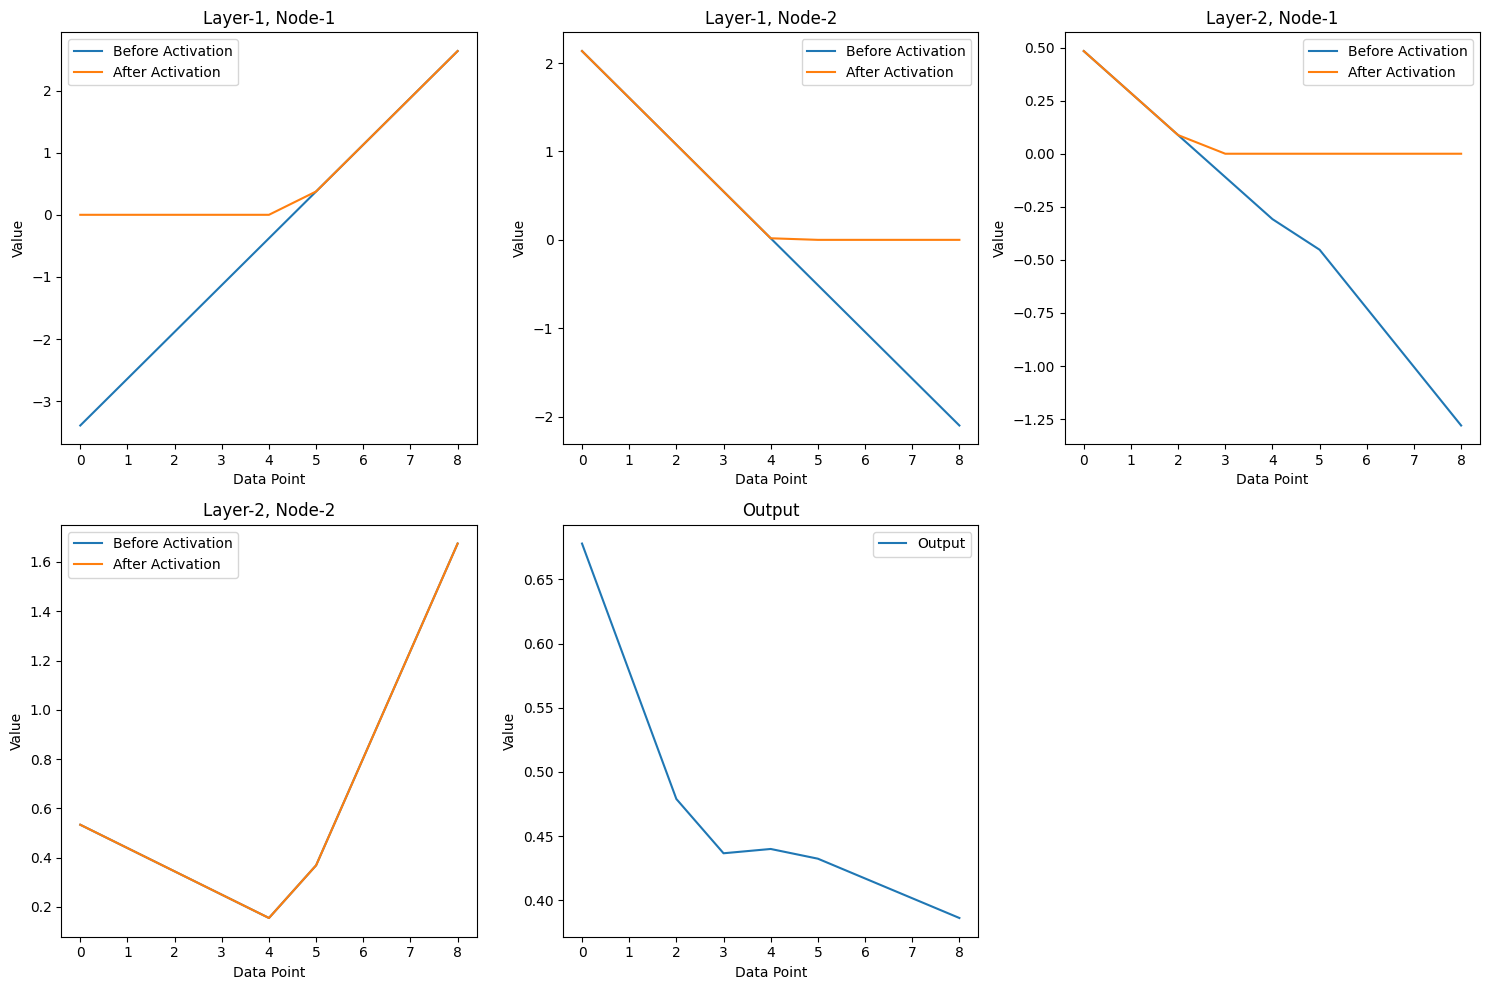

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Plot for Layer-1, Node-1
plt.subplot(2, 3, 1)
plt.plot(output_dict['in_fc1'][0][:, 0].numpy(), label='Before Activation')
plt.plot(output_dict['fc1_x'][0][:, 0].numpy(), label='After Activation')
plt.title('Layer-1, Node-1')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Plot for Layer-1, Node-2
plt.subplot(2, 3, 2)
plt.plot(output_dict['in_fc1'][0][:, 1].numpy(), label='Before Activation')
plt.plot(output_dict['fc1_x'][0][:, 1].numpy(), label='After Activation')
plt.title('Layer-1, Node-2')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Plot for Layer-2, Node-1
plt.subplot(2, 3, 3)
plt.plot(output_dict['in_fc2'][0][:, 0].numpy(), label='Before Activation')
plt.plot(output_dict['fc2_x'][0][:, 0].numpy(), label='After Activation')
plt.title('Layer-2, Node-1')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

# Plot for Layer-2, Node-2
plt.subplot(2, 3, 4)
plt.plot(output_dict['in_fc2'][0][:, 1].numpy(), label='Before Activation')
plt.plot(output_dict['fc2_x'][0][:, 1].numpy(), label='After Activation')
plt.title('Layer-2, Node-2')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(output_dict['out'][0].numpy(), label='Output')
plt.title('Output')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# plt.figure(figsize=(10, 4))
# x_original = dataset[:, 0]
# # Plot before fc1
# plt.subplot(2, 3, 1)
# plt.title('fc1_x')
# plt.plot(output_dict['in_fc1'][0][:, 0],x_original, marker='o', linestyle='-')
# plt.plot(output_dict['fc1_x'][0][:, 0],x_original, marker='o', linestyle='-')
# plt.ylim(-2, 4)
# # plt.show()

# plt.subplot(2, 3, 2)
# plt.title('fc2_x')
# # plt.plot(in_fc1.detach().numpy()[:,0], label='After fc1')
# plt.ylim(-2, 4)

# plt.subplot(2, 3, 3)
# plt.title("out")
# plt.plot(out.detach().numpy(), label='After fc1')
# plt.ylim(-2, 2)

# plt.subplot(2, 3, 4)

# plt.subplot(2, 3, 5)



# # plt.plot(fc_1x[:, 0], input_data[:, 1], marker='o', linestyle='-', label='Input Data')
# # plt.plot(input_data[:, 0], output_data[:, 0], marker='o', linestyle='-', label='Output Data after ' + layer_name)


**Train the MLP for n Epochs.**<br>
In the final part, you will need to save a GIF that animates how the output of each layer (similar to cell above) changes during the training loops.

In [ ]:
output_dict = {'in_fc1': [],'fc1_x': [],'in_fc2': [],'fc2_x': [],'out': []}

### START CODE HERE ###
num_epochs = 6000
log_interval = 1000
frame = []

for epoch in range(num_epochs):

    in_fc1, fc1_x, in_fc2, fc2_x, out = mlp(dataset_tensor[:,1].unsqueeze(1))

    output_dict['in_fc1'].append(in_fc1.detach().numpy())
    output_dict['fc1_x'].append(fc1_x.detach().numpy())
    output_dict['in_fc2'].append(in_fc2.detach().numpy())
    output_dict['fc2_x'].append(fc2_x.detach().numpy())
    output_dict['out'].append(out.detach().numpy())

    loss = criterion(out, dataset_tensor[:, 1].unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % log_interval == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}")
        frame.append(output_dict)
        output_dict = {'in_fc1': [],'fc1_x': [],'in_fc2': [],'fc2_x': [],'out': []}


### END CODE HERE ###

Epoch [1000/6000], Loss: 0.40990757942199707
Epoch [2000/6000], Loss: 0.012781325727701187
Epoch [3000/6000], Loss: 0.0037223799154162407
Epoch [4000/6000], Loss: 0.003078426467254758
Epoch [5000/6000], Loss: 0.0028264736756682396
Epoch [6000/6000], Loss: 0.0025968593545258045


In [ ]:
print(frame)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Plot the final output compare to the original dataset.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)


</details>

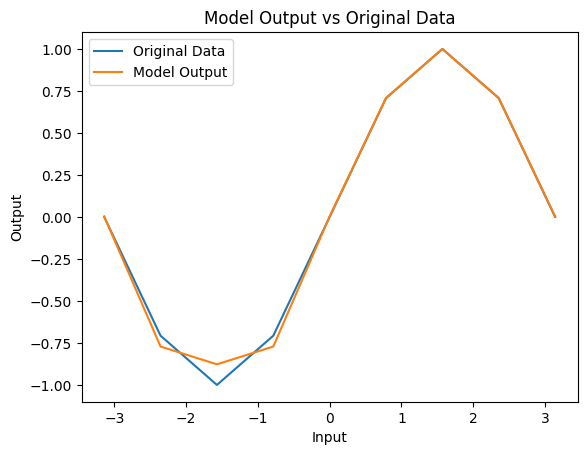

In [ ]:
### START CODE HERE ###
final_out = frame[-1]['out'][-1]

# Plot original data
plt.plot(dataset_tensor[:,0], dataset_tensor[:,1])

# Plot model output
plt.plot(dataset_tensor[:,0], final_out)

plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(['Original Data', 'Model Output'])
plt.title('Model Output vs Original Data')

plt.show()


### END CODE HERE ###

**Save a GIF that animates how the output of each layer changes during the training loops**

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, final_out)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.002596859366192238


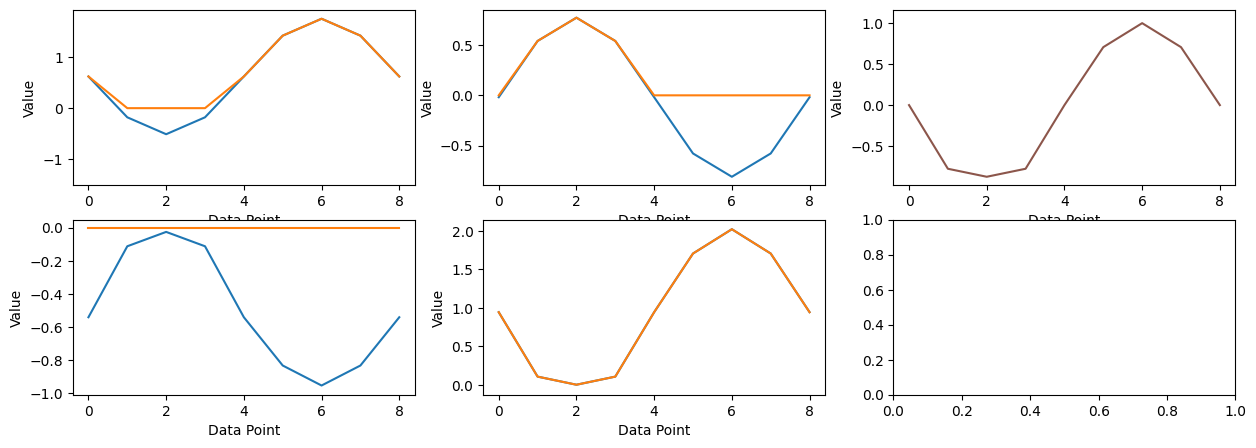

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

fig, axs = plt.subplots(2, 3, figsize=(15, 5))
ims = []
num = 0
for f in frame:
    im = []

    # Plot for Layer-1, Node-1
    ax = axs[0, 0]
    line1, = ax.plot(f['in_fc1'][0][:, 0])
    line2, = ax.plot(f['fc1_x'][0][:, 0])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1, line2])

    # Plot for Layer-1, Node-2
    ax = axs[0, 1]
    line1, = ax.plot(f['in_fc1'][0][:, 1])
    line2, = ax.plot(f['fc1_x'][0][:, 1])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1, line2])

    # Plot for Layer-2, Node-1
    ax = axs[1, 0]
    line1, = ax.plot(f['in_fc2'][0][:, 0])
    line2, = ax.plot(f['fc2_x'][0][:, 0])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1, line2])

    # Plot for Layer-2, Node-2
    ax = axs[1, 1]
    line1, = ax.plot(f['in_fc2'][0][:, 1])
    line2, = ax.plot(f['fc2_x'][0][:, 1])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1, line2])

    # Plot for Output
    ax = axs[0, 2]
    line1, = ax.plot(f['out'][0])
    ax.set_xlabel('Data Point')
    ax.set_ylabel('Value')
    # ax.legend()
    im.extend([line1])

    ims.append(im)
ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True)
ani_js = ani.to_jshtml()

HTML(ani_js)


### Question
1. Calculate and describe a comparison of Mean Square Error (MSE) values between y_predict and y_real.
2. From the Node_result graphs, identify if there is any Node that changes the sign of the weight (slope) from the initial starting weight.
3. Does increasing the number of epochs to 80,000 or increasing/decreasing the learning_rate help reduce the MSE?
4. If the initial weights are changed as specified below, do they affect the number of training epoches and the final results (y_predict)? If there is an impact, Explain.
    model_sate_dict['fc1.weight'] -> [[0.1], [0.1]]
    model_sate_dict['fc1.bias'] -> [-0.1, 0.9]
    model_sate_dict['fc2.weight'] -> [[0.51, -0.1], [-0.5, 0.5]]
    model_sate_dict['fc2.bias'] -> [-0.45,0.1]
    model_sate_dict['fc3.weight'] -> [[-1.5, -0.8]]
    model_sate_dict['fc3.bias'] -> [0.5]

1.Mean Squared Error: 0.001284809583974294

2.L2 Node 2


3.epoch = 80000 ไม่ช่วยให้ mse มีค่าลดลง
ลด lr จะเพิ่ม mse เพิ่ม lr จะทำให้ mse ลดลง


In [ ]:
4.จาก weight ที่เปลี่ยนไป หากเพิ่ม epoch จะมีค่า mse น้อยลง

SyntaxError: invalid decimal literal (<ipython-input-23-a13595b8022b>, line 1)